<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# Nouvelle section

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount("/gdrive")


Mounted at /gdrive


In [4]:
import os
os.listdir("/gdrive/MyDrive/Colab_notebooks")

['erp.xlsx',
 'liaison.xlsx',
 'web.xlsx',
 'caracteristiques_vins.csv',
 'Modèle_présentation-P6.pptx',
 'df_merge_all.xlsx',
 'df_web_sku_anormal.xlsx',
 'Template_Notebook_Bottleneck.ipynb']

In [5]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [6]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("/gdrive/MyDrive/Colab_notebooks/web.xlsx")
#Importation du fichier erp.xlsx
df_erp=pd.read_excel("/gdrive/MyDrive/Colab_notebooks/erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison=pd.read_excel("/gdrive/MyDrive/Colab_notebooks/liaison.xlsx")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichier csv</h3>
</div>

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'étudiant va être très certainement confronté à des difficultés pour ouvrir ce fichier.
Il faudra donc qu'il se documente sur les points suivants:<br>
- notion d'encodage en informatique. ("UTF-8", "ISO-8859-1", etc)<br>
- manipulation de fichier csv, tsv, etc<br>
<br>
Pour lui faire réussir cette étape, l'étudiant devrait suivre ces directives:<br>
- Explorer le fichier à l'aide d'un outil comme Notepad++ afin de visualiser la structure du fichier<br>
- ... ou d'utiliser Excel pour les mêmes raisons. Mais dans ce cas l'étudiant pourrait être tenté de convertir le fichier csv en xlsx, ce que je ne recommande pas: si le fichier est trop gros pour Excel cela deviendra une souffrance de procéder ainsi<br>
- apprendre à ourvrir un fichier avec python à l'aide de l'instruction suivante: <code>with open(nom_fichier, "rb") as f: </code><br>
- utiliser une bibliothèque comme <code>chardet</code> pour tenter d'identifier l'encodage du fichier<br>
</div>

In [7]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("/gdrive/MyDrive/Colab_notebooks/caracteristiques_vins.csv", "rb") as f:
    file = f.read()

#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [8]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("/gdrive/MyDrive/Colab_notebooks/caracteristiques_vins.csv", sep=";")

UnicodeDecodeError: ignored

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [9]:
#Importation de la bibilothèque
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [10]:
#Identification de l'encodage du fichier
import chardet

with open('/gdrive/MyDrive/Colab_notebooks/caracteristiques_vins.csv', 'rb') as f:
    file = f.read()
    result = chardet.detect(file)
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [11]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = ""
type_de_separateur = ""
encodage_du_fichier_csv = ""

df_caracteristiques = pd.read_csv("/gdrive/MyDrive/Colab_notebooks/caracteristiques_vins.csv", sep=";", encoding="Windows-1252")

In [12]:
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [14]:
#Consulter le nombre de colonnes
df_erp.shape[1]

5

In [15]:
#La nature des données dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [16]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

In [17]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [18]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp.loc[df_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [19]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp['stock_status'].unique()

array(['outofstock', 'instock'], dtype=object)

In [20]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
stock_status_2=[]
for i in range (len(df_erp['stock_quantity'])):
    if df_erp['stock_quantity'][i]==0:
        stock_status_2.append("outofstock")
    else:
        stock_status_2.append("instock")
df_erp['stock_status_2']=stock_status_2
df_erp.head()
### fonction apply xxxxxxx

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [21]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [22]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
Comparaison=df_erp["stock_status"] == df_erp["stock_status_2"]
Comparaison.value_counts()

True     824
False      1
dtype: int64

In [23]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
443,4954,1,25.0,0,instock,outofstock


In [24]:
#Corriger la ou les données incohérentes
df_erp["stock_status"]=df_erp["stock_status_2"]

In [25]:
df_erp.loc[443,"stock_status"]

'outofstock'

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [26]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isnull().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print(f"le prix minimum: {df_erp['price'].min()}")
#Afficher le prix maximum de la colonne "price"
print(f"le prix maximum: {df_erp['price'].max()}")

Nombres d'article avec un prix non renseignés: 0
le prix minimum: 5.2
le prix maximum: 225.0


In [27]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print(f"la quantité minimum de stock:{df_erp['stock_quantity'].min()}")
#Afficher la quantité maximum de la colonne "stock_quantity"
print(f"la quantité maximum de stock:{df_erp['stock_quantity'].max()}")

la quantité minimum de stock:0
la quantité maximum de stock:578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [28]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()
### les contenus de cette colonne sigifient de 0 faux c'est à dire que ne pas en vente sur le web et de 1, Vrai qui veut dire en vente sur le web.

array([1, 0])

In [29]:
df_erp['onsale_web'].value_counts()

1    717
0    108
Name: onsale_web, dtype: int64

In [30]:
#Quelles sont les colonnes à conserver selon vous?

In [31]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp = df_erp.drop(["stock_status","stock_status_2"], axis=1)

In [32]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 25.9 KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [33]:
#Dimension du dataset
df_web.ndim

2

In [34]:
#Nombre d'observations
len(df_web)

1513

In [35]:
#Nombre de caractéristiques
df_web.shape[1]

28

In [36]:
#Consulter le nombre de colobnnes
len(df_web.columns)

28

In [37]:
#La nature des données dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [38]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.count()

sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [39]:
#Selon vous, quelles sont les colonnes à conserver ?
df_web.columns[df_web.count()!=0]

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'post_title', 'post_excerpt', 'post_status',
       'comment_status', 'ping_status', 'post_name', 'post_modified',
       'post_modified_gmt', 'post_parent', 'guid', 'menu_order', 'post_type',
       'post_mime_type', 'comment_count'],
      dtype='object')

In [40]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.columns[df_web.count()==0]

Index(['tax_class', 'post_content', 'post_password', 'post_content_filtered'], dtype='object')

In [41]:
df_web.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered'], axis=1, inplace=True)
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1513 non-null   int64         
 2   downloadable       1513 non-null   int64         
 3   rating_count       1513 non-null   int64         
 4   average_rating     1430 non-null   float64       
 5   total_sales        1430 non-null   float64       
 6   tax_status         716 non-null    object        
 7   post_author        1430 non-null   float64       
 8   post_date          1430 non-null   datetime64[ns]
 9   post_date_gmt      1430 non-null   datetime64[ns]
 10  post_title         1430 non-null   object        
 11  post_excerpt       716 non-null    object        
 12  post_status        1430 non-null   object        
 13  comment_status     1430 non-null   object        
 14  ping_sta

In [42]:
#Visualisation des valeurs de la colonne sku
df_web['sku']

0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: sku, Length: 1513, dtype: object

In [43]:
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
code_hors_norme=df_web[df_web['sku'].apply(lambda x: isinstance(x, str))]['sku']
code_hors_norme

0       bon-cadeau-25-euros
797                 13127-1
1209    bon-cadeau-25-euros
1511                13127-1
Name: sku, dtype: object

In [44]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web[df_web['sku'].isin(['bon-cadeau-25-euros','13127-1'])]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [45]:
# Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
# Lorsqu'on regarde les observations dont les codes sont identifiés comme hors norme, on se rend compte que le sku contient des anomalies et des doublons,
# Pour mieux comprendre ce probleme de codification, les lignes concernées seront stockées dans le df_web_sku_anormal qui sera ensuite soumis à des verifications approfondites
# Les syntaxes ci-dessous permettent de séléctionner et de sauvegarder dans df_web_sku_anormal.
df_web_sku_anormal=df_web[df_web['sku'].isin(['bon-cadeau-25-euros','13127-1'])]
df_web_sku_anormal.to_excel("/gdrive/MyDrive/Colab_notebooks/df_web_sku_anormal.xlsx", index=False)

In [46]:
#En attendant, on doit supprimer ces lignes qui ne respectent pas la regle de codification pour pouvoir correctement faire la jonction des différentes dataframe.
df_web = df_web.drop(df_web[df_web['sku'].isin(['bon-cadeau-25-euros', '13127-1'])].index)

In [47]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
### La clé de chaque ligne est en double
df_web.loc[df_web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0,0,0,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,15741,0,0,0,0.0,2.0,NaN,2.0,2020-04-25 12:49:49,2020-04-25 10:49:49,...,closed,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [48]:
#Identifier les lignes sans code articles
df_web[df_web['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
sanscode_df_web=df_web[df_web['sku'].isnull()]

In [50]:
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
sanscode_df_web.info()
#3 - Que constatez-vous?
### Je constate qu'il ya des colonnes ou on a des valeurs qui ne sont pas nulles.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  post_title         2 non-null      object        
 11  post_excerpt       2 non-null      object        
 12  post_status        2 non-null      object        
 13  comment_status     2 non-null      object        
 14  ping_stat

In [51]:
#Suppression de valeurs nulles dans le code sku
df_web = df_web.dropna(subset=['sku'])

In [52]:
### Filtre pour éliminer le doublon, en ne séléctionnant que ceux dont le post_type égale product et supprimer ceux dont le post_type égale attachement
df_web = df_web[df_web['post_type'] == 'product']

In [53]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                712 non-null    object        
 1   virtual            712 non-null    int64         
 2   downloadable       712 non-null    int64         
 3   rating_count       712 non-null    int64         
 4   average_rating     712 non-null    float64       
 5   total_sales        712 non-null    float64       
 6   tax_status         712 non-null    object        
 7   post_author        712 non-null    float64       
 8   post_date          712 non-null    datetime64[ns]
 9   post_date_gmt      712 non-null    datetime64[ns]
 10  post_title         712 non-null    object        
 11  post_excerpt       712 non-null    object        
 12  post_status        712 non-null    object        
 13  comment_status     712 non-null    object        
 14  ping_statu

In [54]:
df_web.loc[df_web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [55]:
df_web['id_web']=df_web['sku']
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 798
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                712 non-null    object        
 1   virtual            712 non-null    int64         
 2   downloadable       712 non-null    int64         
 3   rating_count       712 non-null    int64         
 4   average_rating     712 non-null    float64       
 5   total_sales        712 non-null    float64       
 6   tax_status         712 non-null    object        
 7   post_author        712 non-null    float64       
 8   post_date          712 non-null    datetime64[ns]
 9   post_date_gmt      712 non-null    datetime64[ns]
 10  post_title         712 non-null    object        
 11  post_excerpt       712 non-null    object        
 12  post_status        712 non-null    object        
 13  comment_status     712 non-null    object        
 14  ping_statu

In [56]:
df_web.drop("post_mime_type", axis=1, inplace=True)

In [57]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                712 non-null    object        
 1   virtual            712 non-null    int64         
 2   downloadable       712 non-null    int64         
 3   rating_count       712 non-null    int64         
 4   average_rating     712 non-null    float64       
 5   total_sales        712 non-null    float64       
 6   tax_status         712 non-null    object        
 7   post_author        712 non-null    float64       
 8   post_date          712 non-null    datetime64[ns]
 9   post_date_gmt      712 non-null    datetime64[ns]
 10  post_title         712 non-null    object        
 11  post_excerpt       712 non-null    object        
 12  post_status        712 non-null    object        
 13  comment_status     712 non-null    object        
 14  ping_statu

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [58]:
#Dimension du dataset
df_liaison.ndim

2

In [59]:
#Nombre d'observations
df_liaison.shape[0]

825

In [60]:
#Nombre de caractéristiques
df_liaison.shape[1]

2

In [61]:
#Consulter le nombre de colonnes
len(df_liaison.columns)

2

In [62]:
#La nature des données dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [63]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.count()

product_id    825
id_web        734
dtype: int64

In [64]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
# Comparaison du nombre de valeurs uniques avec le nombre total de lignes dans le dataframe
df_liaison['product_id'].nunique() == len(df_liaison)

True

In [65]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].nunique()==len(df_liaison['id_web'].dropna())

True

In [66]:
#Avons-nous des articles sans correspondances?
sans_correspondance = df_liaison[df_liaison['id_web'].isna() | df_liaison['product_id'].isna()]
print(sans_correspondance)

     product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [67]:
#Dimension du dataset
df_caracteristiques.ndim

2

In [68]:
#Nombre d'observations
df_caracteristiques.shape[0]


611

In [69]:
#Nombre de caractéristiques
df_caracteristiques.shape[1]

13

In [70]:
#Consulter le nombre de colonnes
len(df_caracteristiques.columns)

13

In [71]:
#La nature des données dans chacune des colonnes
df_caracteristiques.dtypes


post_name                   object
poids                       object
Région                      object
Domaine                     object
Appellation                 object
Couleur                     object
Cépage                      object
Millésime                  float64
Garde                       object
Contenance                  object
Degré d'alcool              object
Température dégustation     object
Alliance mets               object
dtype: object

In [72]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_name                611 non-null    object 
 1   poids                    611 non-null    object 
 2   Région                   586 non-null    object 
 3   Domaine                  577 non-null    object 
 4   Appellation              559 non-null    object 
 5   Couleur                  566 non-null    object 
 6   Cépage                   571 non-null    object 
 7   Millésime                541 non-null    float64
 8   Garde                    569 non-null    object 
 9   Contenance               611 non-null    object 
 10  Degré d'alcool           586 non-null    object 
 11  Température dégustation  574 non-null    object 
 12  Alliance mets            574 non-null    object 
dtypes: float64(1), object(12)
memory usage: 62.2+ KB


In [73]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head(5)

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [74]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques.loc[df_caracteristiques.isna().any(axis=1)]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"
581,la-preceptorie-cotes-du-roussillon-coume-marie...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Carignan Blanc, Grenache Blanc, Grenache Gris,...",2020.0,6-8 ans,75cl,15%,12°C,"Poisson en sauce, Viande Blanche, Volaille"
582,la-preceptorie-cotes-du-roussillon-blanc-terre...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Grenache Gris, Macabeu",2020.0,6-8 ans,75cl,15%,12°C,"Crustacés, Fruits de mer, Poisson grillé"
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"


In [75]:
#Est-il possible de corriger les données manquantes?
###OUi, peut être mais pas facile de le corriger

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [76]:
#Fusion des fichiers df_erp et df_liaison
df_erp_liaison=pd.merge(df_erp,df_liaison,on='product_id')
df_erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   id_web          734 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 38.7+ KB


In [77]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
non_matchee=df_erp_liaison[df_erp_liaison["id_web"].isna()]
print(non_matchee)

     product_id  onsale_web  price  stock_quantity id_web
19         4055           0   86.1               0    NaN
49         4090           0   73.0               0    NaN
50         4092           0   47.0               0    NaN
119        4195           0   14.1               0    NaN
131        4209           0   73.5               0    NaN
..          ...         ...    ...             ...    ...
817        7196           0   31.0              55    NaN
818        7200           0   31.0               6    NaN
819        7201           0   31.0              18    NaN
820        7203           0   45.0              30    NaN
821        7204           0   45.0               9    NaN

[91 rows x 5 columns]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [78]:
#Fusionnez les datasets df_merge et df_web
df_erp_liaison_web=pd.merge(df_erp_liaison, df_web, on="id_web", how="left")

In [79]:
df_erp_liaison_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         825 non-null    int64         
 1   onsale_web         825 non-null    int64         
 2   price              825 non-null    float64       
 3   stock_quantity     825 non-null    int64         
 4   id_web             734 non-null    object        
 5   sku                712 non-null    object        
 6   virtual            712 non-null    float64       
 7   downloadable       712 non-null    float64       
 8   rating_count       712 non-null    float64       
 9   average_rating     712 non-null    float64       
 10  total_sales        712 non-null    float64       
 11  tax_status         712 non-null    object        
 12  post_author        712 non-null    float64       
 13  post_date          712 non-null    datetime64[ns]
 14  post_date_

In [80]:
#Avons-nous des lignes sans correspondances?
merge_correspondances=df_erp_liaison_web[df_erp_liaison_web["id_web"].isna()]
merge_correspondances

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
19,4055,0,86.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
49,4090,0,73.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
50,4092,0,47.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
119,4195,0,14.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
131,4209,0,73.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,7196,0,31.0,55,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
818,7200,0,31.0,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
819,7201,0,31.0,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
820,7203,0,45.0,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [81]:
#Fusion de la table df_merge et df_caracteristiques
df_erp_liaison_web_caracteristiques=pd.merge(df_erp_liaison_web, df_caracteristiques, on='post_name', how='left')

In [82]:
df_erp_liaison_web_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               825 non-null    int64         
 1   onsale_web               825 non-null    int64         
 2   price                    825 non-null    float64       
 3   stock_quantity           825 non-null    int64         
 4   id_web                   734 non-null    object        
 5   sku                      712 non-null    object        
 6   virtual                  712 non-null    float64       
 7   downloadable             712 non-null    float64       
 8   rating_count             712 non-null    float64       
 9   average_rating           712 non-null    float64       
 10  total_sales              712 non-null    float64       
 11  tax_status               712 non-null    object        
 12  post_author              712 non-nul

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [83]:
import matplotlib.pyplot as plt

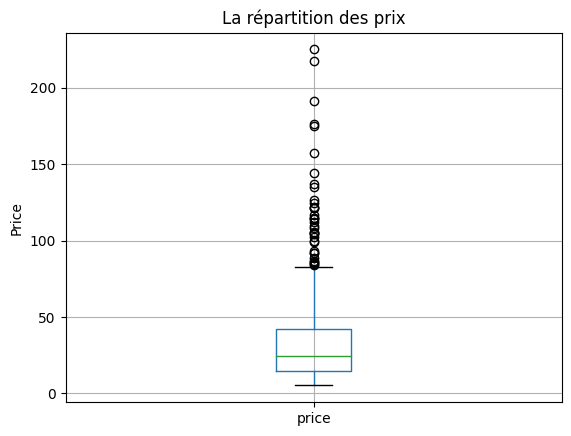

In [84]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_erp_liaison_web_caracteristiques.boxplot(column='price')
plt.title('La répartition des prix')
plt.ylabel('Price')
plt.show()

In [85]:
#Autre méthode avec plotly express
import plotly.express as px
figure=px.box(df_erp_liaison_web_caracteristiques, y='price')
figure.update_layout(title='La répartition des prix')
figure.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [86]:
#Calculer la moyenne du prix
moyenne=df_erp_liaison_web_caracteristiques['price'].mean()
print(moyenne)

32.41563636363637


In [87]:
#Calculer l'écart-type du prix
ecart_type=df_erp_liaison_web_caracteristiques['price'].std()
print(ecart_type)

26.79584919971053


In [88]:
#Calculer le Z-score
df_erp_liaison_web_caracteristiques['z_score'] = (df_erp_liaison_web_caracteristiques['price'] - moyenne) / ecart_type

In [89]:
df_erp_liaison_web_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               825 non-null    int64         
 1   onsale_web               825 non-null    int64         
 2   price                    825 non-null    float64       
 3   stock_quantity           825 non-null    int64         
 4   id_web                   734 non-null    object        
 5   sku                      712 non-null    object        
 6   virtual                  712 non-null    float64       
 7   downloadable             712 non-null    float64       
 8   rating_count             712 non-null    float64       
 9   average_rating           712 non-null    float64       
 10  total_sales              712 non-null    float64       
 11  tax_status               712 non-null    object        
 12  post_author              712 non-nul

In [90]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuils_sup_3 = df_erp_liaison_web_caracteristiques[df_erp_liaison_web_caracteristiques['z_score'] > 3]

In [91]:
seuils_sup_3['price']

208    225.0
210    126.5
227    176.0
230    157.0
242    144.0
411    137.0
460    217.5
556    124.8
598    175.0
635    191.3
651    122.0
652    114.0
697    135.0
703    116.4
708    115.0
709    121.0
711    115.0
712    121.0
Name: price, dtype: float64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [92]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_erp_liaison_web_caracteristiques['price'].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [93]:
#Définissez un seuil pour les articles "outliers" en prix

In [94]:
# Calculer les quartiles
df_erp_liaison_web_caracteristiques['Q1']= df_erp_liaison_web_caracteristiques['price'].quantile(0.25)
df_erp_liaison_web_caracteristiques['Q3']= df_erp_liaison_web_caracteristiques['price'].quantile(0.75)

In [95]:
df_erp_liaison_web_caracteristiques.head()

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,Q1,Q3
0,3847,1,24.2,0,15298,15298,0.0,0.0,0.0,0.0,...,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.306601,14.6,42.0
1,3849,1,34.3,0,15296,15296,0.0,0.0,0.0,0.0,...,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.070323,14.6,42.0
2,3850,1,20.8,0,15300,15300,0.0,0.0,0.0,0.0,...,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille",-0.433486,14.6,42.0
3,4032,1,14.1,0,19814,19814,0.0,0.0,0.0,0.0,...,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.683525,14.6,42.0
4,4039,1,46.0,0,19815,19815,0.0,0.0,0.0,0.0,...,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge",0.506958,14.6,42.0


In [96]:
# Calculer l'écart interquartile (IQR)
df_erp_liaison_web_caracteristiques['IQR'] = df_erp_liaison_web_caracteristiques['Q3'] - df_erp_liaison_web_caracteristiques['Q1']

In [97]:
# Définir les seuils inférieur et supérieur pour les outliers
df_erp_liaison_web_caracteristiques['seuil_inf']= df_erp_liaison_web_caracteristiques['Q1'] - 1.5 *df_erp_liaison_web_caracteristiques['IQR']
df_erp_liaison_web_caracteristiques['seuil_sup']= df_erp_liaison_web_caracteristiques['Q3'] + 1.5 *df_erp_liaison_web_caracteristiques['IQR']

In [98]:
df_erp_liaison_web_caracteristiques.head()

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,Q1,Q3,IQR,seuil_inf,seuil_sup
0,3847,1,24.2,0,15298,15298,0.0,0.0,0.0,0.0,...,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.306601,14.6,42.0,27.4,-26.5,83.1
1,3849,1,34.3,0,15296,15296,0.0,0.0,0.0,0.0,...,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.070323,14.6,42.0,27.4,-26.5,83.1
2,3850,1,20.8,0,15300,15300,0.0,0.0,0.0,0.0,...,75cl,13%,15°C,"Viande rouge, Volaille",-0.433486,14.6,42.0,27.4,-26.5,83.1
3,4032,1,14.1,0,19814,19814,0.0,0.0,0.0,0.0,...,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.683525,14.6,42.0,27.4,-26.5,83.1
4,4039,1,46.0,0,19815,19815,0.0,0.0,0.0,0.0,...,75cl,13%,17°C,"Gibier, Viande rouge",0.506958,14.6,42.0,27.4,-26.5,83.1


In [99]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

In [100]:
# Calculer le nombre de product_id avec seuil_sup
nombre_produit= len(df_erp_liaison_web_caracteristiques[df_erp_liaison_web_caracteristiques['price'] >= 83])
nombre_produit

38

In [101]:
# Calculer la proportion
proportion=round((nombre_produit/len(df_erp_liaison_web_caracteristiques))*100, 2)

In [102]:
print("le nombre d'articles et la proportion de l'ensemble du catalogue outliers sont :", nombre_produit,"arcticles et ", round(proportion, 2), "%")

le nombre d'articles et la proportion de l'ensemble du catalogue outliers sont : 38 arcticles et  4.61 %


In [103]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [104]:
##############################
# Calculer le CA su site web #
##############################
#Créez une colonne calculant le CA par article
df_erp_liaison_web_caracteristiques['ca_par_article']=df_erp_liaison_web_caracteristiques['price']*df_erp_liaison_web_caracteristiques['total_sales']
#Calculez la somme de la colonne "ca_par_article"
df_erp_liaison_web_caracteristiques['ca_par_article'].sum()
#Ce résultat correspond au chiffre d'affaire du site web

70318.6

In [105]:
###############################
# Palmares des articles en CA #
###############################
#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_erp_liaison_web_caracteristiques.sort_values(by='ca_par_article', ascending=False, inplace=True)


In [106]:
#Réinitialiser l'index du dataset par un reset_index
df_erp_liaison_web_caracteristiques.reset_index(drop=True, inplace=True)

In [107]:
#Afficher les 20 premier articles en CA
top_20_articles=df_erp_liaison_web_caracteristiques.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(top_20_articles, x='ca_par_article', title='Palmarès des 20 premiers articles en CA')
fig.show()

In [108]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_erp_liaison_web_caracteristiques['CA_cumule'] = df_erp_liaison_web_caracteristiques['ca_par_article'].cumsum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
CA_total = df_erp_liaison_web_caracteristiques['ca_par_article'].sum()
df_erp_liaison_web_caracteristiques['Pourcentage_CA_cumule'] = (df_erp_liaison_web_caracteristiques['CA_cumule'] / CA_total) * 100
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
top_20_percent = df_erp_liaison_web_caracteristiques.loc[df_erp_liaison_web_caracteristiques['Pourcentage_CA_cumule'] >= 80]
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
top_20_percent

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Alliance mets,z_score,Q1,Q3,IQR,seuil_inf,seuil_sup,ca_par_article,CA_cumule,Pourcentage_CA_cumule
130,4050,1,21.8,0,16449,16449,0.0,0.0,0.0,0.0,...,"Apéritif, Fromages, Poissons, Viande Blanche, ...",-0.396167,14.6,42.0,27.4,-26.5,83.1,130.8,56370.7,80.164707
131,5487,1,43.5,1,16129,16129,0.0,0.0,0.0,0.0,...,"Veau, Viande Blanche, Viande rouge",0.413660,14.6,42.0,27.4,-26.5,83.1,130.5,56501.2,80.350291
132,4865,1,9.8,1,16274,16274,0.0,0.0,0.0,0.0,...,"Apéritif, Cuisine Exotique, Saumon fumé, Sucré...",-0.843998,14.6,42.0,27.4,-26.5,83.1,127.4,56628.6,80.531467
133,4056,1,12.7,0,16029,16029,0.0,0.0,0.0,0.0,...,"Charcuterie, Viande rouge",-0.735772,14.6,42.0,27.4,-26.5,83.1,127.0,56755.6,80.712073
134,4650,1,25.3,14,15206,15206,0.0,0.0,0.0,0.0,...,"Risotto saumon, Salade de chèvre chaud, Saumon...",-0.265550,14.6,42.0,27.4,-26.5,83.1,126.5,56882.1,80.891969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,4653,1,36.2,18,13515,13515,0.0,0.0,0.0,0.0,...,"Gibier, Tartare de Boeuf, Viande rouge",0.141229,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000
708,5483,1,17.9,22,15753,15753,0.0,0.0,0.0,0.0,...,"Fromages, Viande Blanche, Viande rouge, Volaille",-0.541712,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000
709,5481,1,11.5,46,15138,15138,0.0,0.0,0.0,0.0,...,"Charcuterie, Salade, Viande Blanche, Viande ro...",-0.780555,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000
710,4654,1,33.4,0,13514,13514,0.0,0.0,0.0,0.0,...,NaN,0.036736,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [109]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_erp_liaison_web_caracteristiques.sort_values(by='total_sales', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_erp_liaison_web_caracteristiques.reset_index(drop=True,inplace=True)

In [110]:
#Afficher les 20 premier articles en quantité
top_20_quantite_vente=df_erp_liaison_web_caracteristiques.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
fig=px.bar(top_20_quantite_vente, y='total_sales', title='Palmares des articles en quantité')
fig.show()

In [111]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_erp_liaison_web_caracteristiques['quantite_vente_cumule'] = df_erp_liaison_web_caracteristiques['total_sales'].cumsum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
total_quantite_vente= df_erp_liaison_web_caracteristiques['total_sales'].sum()
df_erp_liaison_web_caracteristiques['Pourcentage_quantite_vente'] = (df_erp_liaison_web_caracteristiques['quantite_vente_cumule'] / total_quantite_vente) * 100

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

top_20_percent_quantite_vente = df_erp_liaison_web_caracteristiques.loc[df_erp_liaison_web_caracteristiques['Pourcentage_quantite_vente'] >= 80]

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
top_20_percent_quantite_vente

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Q1,Q3,IQR,seuil_inf,seuil_sup,ca_par_article,CA_cumule,Pourcentage_CA_cumule,quantite_vente_cumule,Pourcentage_quantite_vente
149,4919,1,24.4,0,15531,15531,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,146.4,54306.0,77.228500,2284.0,80.000000
150,3847,1,24.2,0,15298,15298,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,145.2,54451.2,77.434989,2290.0,80.210158
151,4682,1,9.1,26,15575,15575,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,54.6,65821.2,93.604253,2296.0,80.420315
152,4050,1,21.8,0,16449,16449,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,130.8,56370.7,80.164707,2302.0,80.630473
153,5950,1,46.0,0,15432,15432,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,230.0,44945.9,63.917513,2307.0,80.805604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,6663,1,50.4,6,16152,16152,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000,2855.0,100.000000
708,6664,1,35.6,38,15661,15661,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000,2855.0,100.000000
709,6666,1,48.5,24,16067,16067,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000,2855.0,100.000000
710,6751,1,46.5,0,16144,16144,0.0,0.0,0.0,0.0,...,14.6,42.0,27.4,-26.5,83.1,0.0,70318.6,100.000000,2855.0,100.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [112]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.

In [ ]:
# Enregistrement du dataframe dans un fichier Excel
df_erp_liaison_web_caracteristiques.to_excel("/gdrive/MyDrive/Colab_notebooks/df_merge_all.xlsx", index=False)